In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#transpose matrix to have sample as row, gene in column
LumB_transpose = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\Normalized expression data set\LumB_NT_logCPMrmBatch_20221128.csv", index_col=[0])
LumB = LumB_transpose.transpose()


In [3]:
LumB.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288596.2,ENSG00000288597.1,ENSG00000288598.1,ENSG00000288605.1,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288663.1,ENSG00000288670.1,ENSG00000288674.1,ENSG00000288675.1
TCGA-BH-A18L-01A-32R-A12D-07,3.796723,-1.592569,5.488847,5.565947,4.133173,1.825989,4.246394,5.300571,6.275736,5.062348,...,2.637709,-2.843709,-1.777694,-4.669336,0.106314,-1.068547,-1.363650,3.554084,-2.777903,-3.250795
TCGA-BH-A18L-11A-42R-A12D-07,6.001822,5.060586,4.632446,4.083756,1.859624,3.382807,7.496016,5.827862,5.680703,4.983217,...,1.473402,-3.462384,-0.814608,-1.074381,0.242212,-2.449868,-0.845473,2.546383,-1.945206,-1.555891
TCGA-A8-A06Q-01A-11R-A034-07,3.472321,-3.973835,5.957772,5.312124,4.275320,1.257700,3.860923,6.001166,3.996684,5.859524,...,2.669675,-4.542203,-2.195066,-4.247532,-0.551502,-4.812348,-1.012198,3.593426,-2.859850,-1.634434
TCGA-D8-A27R-01A-11R-A16F-07,5.377298,-1.456251,5.852683,4.122953,3.364577,2.599732,5.137377,5.826182,5.545563,5.718289,...,2.805630,-1.752979,-1.795517,-4.464834,0.047999,-2.341025,0.018289,2.474999,-2.701379,-1.848539
TCGA-AO-A03N-01B-11R-A10J-07,4.561910,-3.757693,5.571911,4.277566,3.651202,2.114561,4.547382,5.970680,5.287439,6.162688,...,1.243537,-4.909499,-1.117839,-5.017469,-0.235653,-4.309725,-1.771870,2.116438,-4.041964,0.233013


In [4]:
#PCA
pca = PCA(n_components=50)
principalComponents_LumB = pca.fit_transform(LumB)
principal_LumB_Df = pd.DataFrame(data = principalComponents_LumB
             , columns = ["PC"+str(i) for i in range(1, 51)])
principal_LumB_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-87.809337,55.084933,31.475797,-36.375494,3.949593,-13.870584,6.410449,29.522246,-8.274597,-16.774032,...,40.034622,3.708710,-14.422532,-3.391562,18.413569,3.257354,-27.711661,6.093777,-4.536770,-15.978965
1,139.970561,10.316324,-5.732770,18.207403,1.648064,1.783971,-18.385289,-9.603544,-1.331358,-1.973430,...,-5.486577,-6.454594,1.478059,4.572170,2.243630,2.594753,-7.804944,1.501931,-3.637543,0.051037
2,-89.702430,-2.955181,30.846515,-2.408181,-26.191985,26.194649,55.845788,61.921928,23.265433,-12.153234,...,-5.917477,19.470259,-1.783296,-19.302104,9.631094,4.179489,-17.368983,24.478491,-7.693960,-31.842788
3,-61.273903,-14.804262,-25.558383,-23.008202,44.565648,-31.406703,-0.372780,-20.769104,-2.694805,-29.963383,...,-7.875507,10.652085,0.469150,-1.139362,-10.424935,-0.656941,-6.451312,-9.770173,-12.618834,3.547548
4,-64.751233,4.714444,-18.604949,104.081843,-21.389207,-1.390952,15.512761,21.207498,-2.270896,0.199401,...,-16.930694,-0.450167,-16.333979,17.984616,-6.891819,-22.112651,-6.626242,22.760672,-6.490407,-6.959137


In [5]:
# Take pam50 column from metadata and set as index of PCA dataframe
unsorted_metadata = pd.read_csv(r"C:\Users\javte\Documents\SSEF project\Normalized expression data set\metadata\selected_metadat_20221128.csv")
unsorted_metadata.head()
LumB_metadata = unsorted_metadata.query('pam50 == "LumB" or pam50 == "Healthy"')
LumB_metadata.head()
LumB_pam50 = LumB_metadata[('pam50')].to_list()
principal_LumB_Df['pam50'] = LumB_pam50
principal_LumB_Df.set_index('pam50', drop = True, inplace = True)
principal_LumB_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
pam50,,,,,,,,,,,,,,,,,,,,,
LumB,-87.809337,55.084933,31.475797,-36.375494,3.949593,-13.870584,6.410449,29.522246,-8.274597,-16.774032,...,40.034622,3.708710,-14.422532,-3.391562,18.413569,3.257354,-27.711661,6.093777,-4.536770,-15.978965
Healthy,139.970561,10.316324,-5.732770,18.207403,1.648064,1.783971,-18.385289,-9.603544,-1.331358,-1.973430,...,-5.486577,-6.454594,1.478059,4.572170,2.243630,2.594753,-7.804944,1.501931,-3.637543,0.051037
LumB,-89.702430,-2.955181,30.846515,-2.408181,-26.191985,26.194649,55.845788,61.921928,23.265433,-12.153234,...,-5.917477,19.470259,-1.783296,-19.302104,9.631094,4.179489,-17.368983,24.478491,-7.693960,-31.842788
LumB,-61.273903,-14.804262,-25.558383,-23.008202,44.565648,-31.406703,-0.372780,-20.769104,-2.694805,-29.963383,...,-7.875507,10.652085,0.469150,-1.139362,-10.424935,-0.656941,-6.451312,-9.770173,-12.618834,3.547548
LumB,-64.751233,4.714444,-18.604949,104.081843,-21.389207,-1.390952,15.512761,21.207498,-2.270896,0.199401,...,-16.930694,-0.450167,-16.333979,17.984616,-6.891819,-22.112651,-6.626242,22.760672,-6.490407,-6.959137


<Figure size 640x480 with 0 Axes>

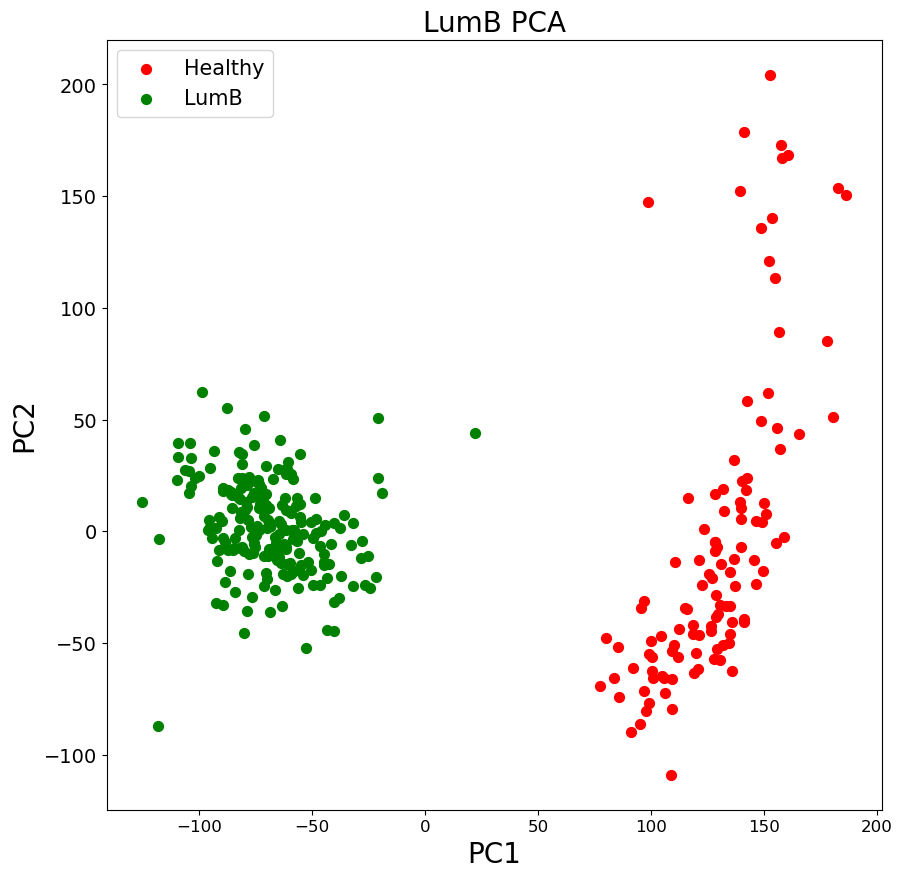

In [6]:
#formatting plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("LumB PCA",fontsize=20)
targets = ['Healthy', 'LumB']
colours = ['r', 'g']
#colour code points according to pam50
for target, colour in zip(targets,colours):
    index = principal_LumB_Df.index == target
    plt.scatter(principal_LumB_Df.loc[index, 'PC1']
               , principal_LumB_Df.loc[index, 'PC2'], c = colour, s = 50)
#plot legend
plt.legend(targets,prop={'size': 15})





In [1]:
import matplotlib.pyplot as plt
plt.bar(x=principal_LumA_Df.columns[:10], height = pca.explained_variance_[:10])

NameError: name 'principal_LumA_Df' is not defined